# Covid-19 - A Data Analysis & Visualization 

In [ ]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('/content/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Basic info and description of the dataset

In [ ]:
df.shape

(236017, 8)

In [ ]:
#Get information and description of dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              236017 non-null  int64  
 1   ObservationDate  236017 non-null  object 
 2   Province/State   173972 non-null  object 
 3   Country/Region   236017 non-null  object 
 4   Last Update      236017 non-null  object 
 5   Confirmed        236017 non-null  float64
 6   Deaths           236017 non-null  float64
 7   Recovered        236017 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.4+ MB


In [ ]:
#Get information and description of dataset.

df.describe()

,SNo,Confirmed,Deaths,Recovered,Active
count,108640.00000,1.086400e+05,108640.000000,1.086400e+05,1.086400e+05
mean,54320.50000,1.744133e+04,740.068446,9.913235e+03,6.788026e+03
std,31361.81096,5.304464e+04,2790.950067,5.588085e+04,5.790122e+04
min,1.00000,0.000000e+00,0.000000,0.000000e+00,-2.434658e+06
25%,27160.75000,2.110000e+02,3.000000,3.000000e+00,2.800000e+01
50%,54320.50000,1.902000e+03,38.000000,3.520000e+02,5.280000e+02
75%,81480.25000,9.464250e+03,301.000000,3.341250e+03,3.081250e+03
max,108640.00000,1.037765e+06,42072.000000,2.434658e+06,7.446060e+05


Dealing with Null Values

In [ ]:
#See if any null values are present. Display count of null values.

df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     62045
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [ ]:
#Dealing with NA values

df.dropna(inplace = True)
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [ ]:
#Checking for null values again

df.isnull().sum()

#now the dataset has no NA values

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [ ]:
df.corr(method = 'pearson')

,SNo,Confirmed,Deaths,Recovered
SNo,1.000000,0.230194,0.170608,0.135387
Confirmed,0.230194,1.000000,0.848927,0.397691
Deaths,0.170608,0.848927,1.000000,0.338478
Recovered,0.135387,0.397691,0.338478,1.000000


Displaying top 8 Countries/Regions records

In [ ]:
#Use sorting of data in dataframe to display topmost 5 or 8 records based on one or more column values
#(conditional filtering)
#Get frequency listing of any one relavant column 


data = df['Country/Region'].value_counts().sort_values(ascending = False)
data.head(8)

US                11718
Russia             8632
Mainland China     7283
Japan              5241
Mexico             3712
Colombia           3621
India              3467
Brazil             3151
Name: Country/Region, dtype: int64

Finding out the total number of recorded updates for each Province/State

In [ ]:
#Get frequency listing of any one relavant column 
#Use of group by on one or more columns
#Use of appropriate aggregate functions with groupby.


count = df.groupby(['Province/State']).size() 
count.head(10)

Province/State
 Montreal, QC           10
 Norfolk County, MA      5
Abruzzo                122
Acre                   116
Adygea Republic        104
Aguascalientes         116
Aichi                  108
Akita                  108
Alabama                184
Alagoas                116
dtype: int64

In [ ]:
#Accessing particular row based on certain condition and displaying only one or few columns from it.

Finding out the recovered cases in each Province/State in India

In [ ]:
#Sorting of rows and columns,(explicit indexing - loc)
#conditional filtering


df.loc[df['Country/Region'] == 'India',['Province/State','Recovered']].head(10)

,Province/State,Recovered
38811,Andaman and Nicobar Islands,33.0
38812,Andhra Pradesh,2802.0
38828,Arunachal Pradesh,1.0
38829,Assam,1085.0
38851,Bihar,2864.0
38884,Chandigarh,286.0
38891,Chhattisgarh,386.0
38910,Dadar Nagar Haveli,2.0
38914,Delhi,11861.0
38943,Goa,67.0


Segregating records for the state of Maharashtra only

In [ ]:
new = df.loc[(df['Country/Region']=='India') & (df['Province/State']=='Maharashtra')]
new.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
39066,39067,06/10/2020,Maharashtra,India,2020-06-11 03:33:41,90787.0,3289.0,42638.0,44860.0
39791,39792,06/11/2020,Maharashtra,India,2020-06-12 05:09:52,97648.0,3590.0,46078.0,47980.0
40520,40521,06/12/2020,Maharashtra,India,2020-06-13 03:33:14,97648.0,3590.0,46078.0,47980.0
41249,41250,06/13/2020,Maharashtra,India,2020-06-14 03:33:15,101141.0,3717.0,47796.0,49628.0
41978,41979,06/14/2020,Maharashtra,India,2020-06-15 03:33:14,104568.0,3830.0,49346.0,51392.0


Finding out records in Maharasthra, India with Confimed cases > 100000

In [ ]:
#Selection on particular groups based on name or condition

new2 = df.loc[(df['Country/Region']=='India') & (df['Province/State']=='Maharashtra') & (df['Confirmed']>100000)]
new2.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
41249,41250,06/13/2020,Maharashtra,India,2020-06-14 03:33:15,101141.0,3717.0,47796.0,49628.0
41978,41979,06/14/2020,Maharashtra,India,2020-06-15 03:33:14,104568.0,3830.0,49346.0,51392.0
42707,42708,06/15/2020,Maharashtra,India,2020-06-16 04:33:09,110744.0,4128.0,56049.0,50567.0
43436,43437,06/16/2020,Maharashtra,India,2020-06-17 04:33:21,113445.0,5537.0,57851.0,50057.0
44165,44166,06/17/2020,Maharashtra,India,2020-06-18 04:33:18,116752.0,5651.0,59166.0,51935.0


For figuring out the death count for every country/region 

In [ ]:
#Sorting of rows and columns,(implicit - iloc)
#Use of group by on one or more columns
#Use of appropriate aggregate functions with groupby.

d = df.iloc[:, [3,6]].groupby(df.iloc[:, 3]).sum()
d.head(10)

,Deaths
Country/Region,
Australia,34247.0
Austria,0.0
Brazil,8883731.0
Canada,1127248.0
Chile,813018.0
Colombia,981134.0
Denmark,42.0
France,16206.0
Germany,1092019.0


Using iloc to find out Total Confirmed, Recovered and Death cases

In [ ]:
# Group data by date
date_grouped=df.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

print('Total number of Confirmed cases around the world: %s' % date_grouped["Confirmed"].iloc[-1])
print('Total number of Recovered cases around the world: %s' % date_grouped["Recovered"].iloc[-1])
print('Total number of Death cases around the world: %s' % date_grouped["Deaths"].iloc[-1])

date_grouped.tail()

Total number of Confirmed cases around the world: 58584503.0
Total number of Recovered cases around the world: 28329567.0
Total number of Death cases around the world: 1302878.0


,Confirmed,Recovered,Deaths
ObservationDate,,,
12/27/2020,56673655.0,27617563.0,1265735.0
12/28/2020,57043735.0,27787903.0,1272055.0
12/29/2020,57536079.0,27983576.0,1282578.0
12/30/2020,58077528.0,28202934.0,1293492.0
12/31/2020,58584503.0,28329567.0,1302878.0


Countries with Max/Min cases recorded 

In [ ]:
#Minimum and maximum values related analysis

print('Country/Region with maximum cases ever recorded:',df['Country/Region'].max())
print('Country/Region with minimum cases ever recorded:',df['Country/Region'].min())

Country/Region with maximum cases ever recorded: Ukraine
Country/Region with minimum cases ever recorded: Australia


Active cases

In [ ]:
#Adding new column to existing dataframe and polulating same using existing columns data

#Creating new column "Active" to calculate active cases
#Active = Confirmed - Deaths - Recovered

df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0


Finding out places in US where Active cases are higher than 100000

In [ ]:
#Selection on particular groups based on name or condition

a = df.loc[(df['Country/Region']=='US') & (df['Active']>100000)]
a.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
11594,11595,04/03/2020,New York,US,2020-04-03 22:52:45,102987.0,2935.0,0.0,100052.0
11913,11914,04/04/2020,New York,US,4/4/20 9:38,113833.0,3565.0,0.0,110268.0
12233,12234,04/05/2020,New York,US,2020-04-05 23:13:44,123160.0,4159.0,0.0,119001.0
12555,12556,04/06/2020,New York,US,4/6/20 9:37,131815.0,4698.0,0.0,127117.0
12877,12878,04/07/2020,New York,US,2020-04-07 23:11:31,139875.0,5489.0,0.0,134386.0


Finding what the correlation between the confirmed cases and death is

In [ ]:
#Find correlation between any two columns values.

con_col = df['Confirmed']
deaths_col = df['Deaths']

correlation = con_col.corr(deaths_col)
print(correlation)

0.7581390522355758


Normalization

In [ ]:
#Try transformation(normalization using any technique) on data set

lowerlim=np.min(df['Active'])
upperlim=np.max(df['Active'])
limit=upperlim-lowerlim
mean=np.mean(df['Active'])
def myfunc(x,x_mean,xrange):
    return (x-x_mean)/xrange
print(df['Active'].apply(lambda x:myfunc(x,mean,limit)).head(10))

0   -0.002135
1   -0.002131
2   -0.002133
3   -0.002135
4   -0.002135
5   -0.002127
6   -0.002134
7   -0.002135
8   -0.002134
9   -0.002135
Name: Active, dtype: float64


Joining, merging and concatenation

In [ ]:
#Joining, merging and concatenation of data in dataframe.

df1=pd.DataFrame({'ObservationDate':['06/13/2020'],'Country/Region':['India'],'Province/State':['Maharashtra'],'Confirmed':['48609']})
df2=pd.DataFrame({'ObservationDate':['08/04/2020'],'Country/Region':['Russia'],'Province/State':['Altai'],'Confirmed':['2401']})
df3=pd.DataFrame({'ObservationDate':['04/03/2020'],'Country/Region':['US'],'Province/State':['New York'],'Confirmed':['8000']})
df4=pd.DataFrame({'ObservationDate1':['07/13/2020'],'Country/Region1':['India'],'Province/State1':['Kerela'],'Confirmed1':['48609']})


#concatenation

conn = pd.concat([df1,df3])
conn


,ObservationDate,Country/Region,Province/State,Confirmed
0,06/13/2020,India,Maharashtra,48609
0,04/03/2020,US,New York,8000


In [ ]:
#join

df1.join(df4)

,ObservationDate,Country/Region,Province/State,Confirmed,ObservationDate1,Country/Region1,Province/State1,Confirmed1
0,06/13/2020,India,Maharashtra,48609,07/13/2020,India,Kerela,48609


In [ ]:
#merge

pd.merge(df1,df2,how='left')

,ObservationDate,Country/Region,Province/State,Confirmed
0,06/13/2020,India,Maharashtra,48609


# Conclusions

1) Top 5 countries with the highest amount of records are US, Russia, Mainland China, Japan and Mexico with US topping the list

2) India ranks at the 7th position for the same.

3) Abruzzo, Italy has the highest number of recorded updates for each Province/State

4) The total number of confirmed in the world :  28759036.0

5) The total number of deaths in the world :  920231.0

6) The total number of recovered in the world :  19439157.0

7) Country/Region with maximum cases ever recorded: Ukraine

8) Country/Region with minimum cases ever recorded: Australia

9) The correlation between confirmed cases and deaths has been calculated as = 0.7581390522355758


# Visualizations

In [ ]:
#importing libraries for visualizations
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#analysing a sample of 10000 random records from the dataset for the purpose of better visualization

sam = df.sample(10000)
sam

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
202664,202665,01/15/2021,Balochistan,Pakistan,2021-01-16 05:22:40,18537.0,190.0,18060.0,287.0
68780,68781,07/20/2020,Vologda Oblast,Russia,2020-07-21 04:38:46,2114.0,19.0,1629.0,466.0
211976,211977,01/27/2021,Iwate,Japan,2021-01-28 05:22:24,495.0,26.0,432.0,37.0
88677,88678,08/16/2020,Niigata,Japan,2020-08-17 04:27:20,128.0,0.0,121.0,7.0
170258,170259,12/03/2020,Oklahoma,US,2020-12-04 05:27:27,204048.0,1836.0,0.0,202212.0
...,...,...,...,...,...,...,...,...,...
183051,183052,12/20/2020,Kemerovo Oblast,Russia,2020-12-21 05:27:58,24150.0,445.0,20933.0,2772.0
79658,79659,08/04/2020,Ladakh,India,2020-08-05 04:34:43,1534.0,7.0,1127.0,400.0
234392,234393,02/25/2021,Tasmania,Australia,2021-02-26 05:22:40,234.0,13.0,221.0,0.0
206552,206553,01/20/2021,Donetsk Oblast,Ukraine,2021-01-21 05:22:01,42199.0,780.0,36075.0,5344.0


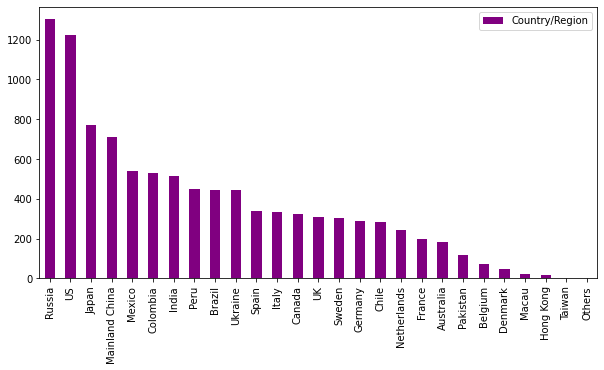

In [ ]:
# Visualization to summarize your data set (frequency plot)
sam['Country/Region'].value_counts().plot(kind="bar",color='purple',figsize=(10,5))
plt.legend()

Comparing total world cases and India cases with a bar plot

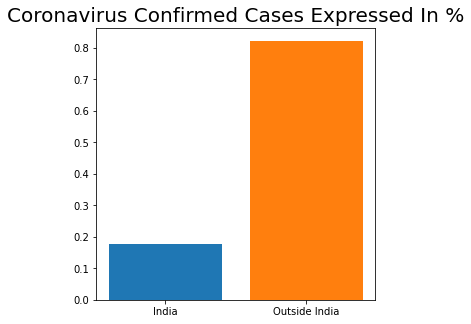

In [ ]:
total_world_cases = np.sum(df['Confirmed'])
india_confirmed = df[df['Country/Region']=='India']['Confirmed'].sum()
outside_india_confirmed = total_world_cases - india_confirmed

plt.figure(figsize=(5, 5))
plt.bar('India', india_confirmed/total_world_cases)
plt.bar('Outside India', outside_india_confirmed/total_world_cases)
plt.title('Coronavirus Confirmed Cases Expressed In %', size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [ ]:
print('Outside India - {} cases ({}%)'.format(outside_india_confirmed, np.round((outside_india_confirmed/total_world_cases)*100, 1)))
print('India  -  {} cases - ({}%)'.format(india_confirmed, np.round((india_confirmed/total_world_cases)*100, 1)))
print('Total - {} cases'.format(total_world_cases))

Outside India - 7861433967.0 cases (82.2%)
India  -  1700177904.0 cases - (17.8%)
Total - 9561611871.0 cases


Using a bar plot to analyse Confirmed cases in various Provinces/State of China

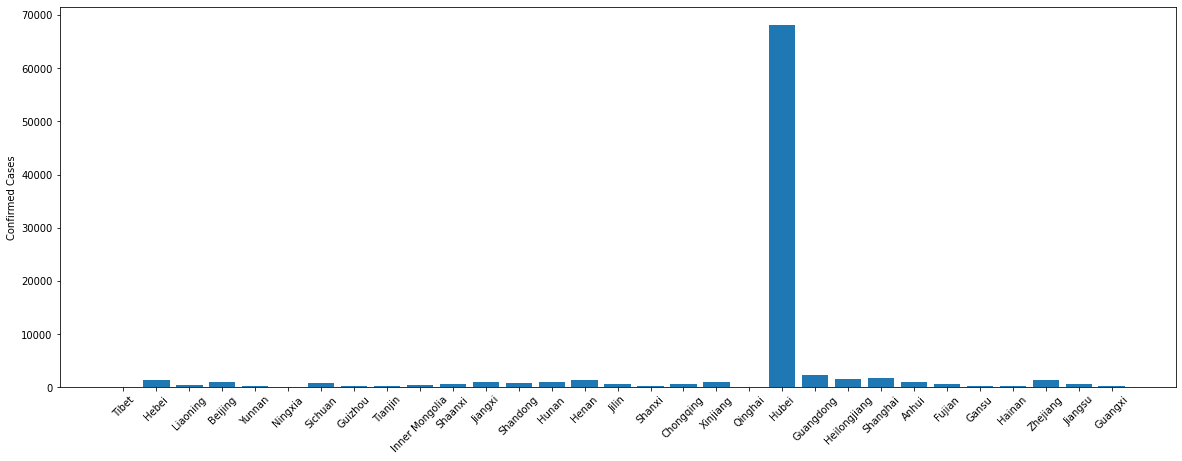

In [ ]:
data_china = sam[(sam["Country/Region"] == "Mainland China")]  # filtering dataframe for China
x = plt.subplots(figsize=(20,7)) 
plt.bar(data_china["Province/State"],data_china["Confirmed"])
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases')
plt.show()

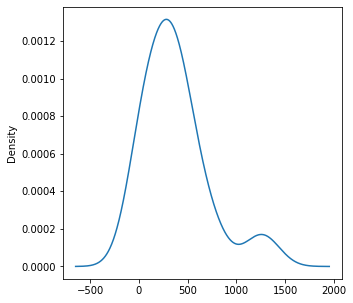

In [ ]:
# Visualization to summarize your data set (density plot)

sam.groupby(['Country/Region']).size().plot(kind='kde',figsize=(5,5))

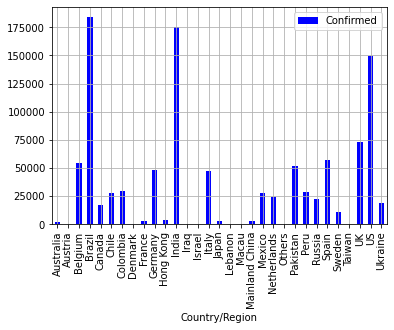

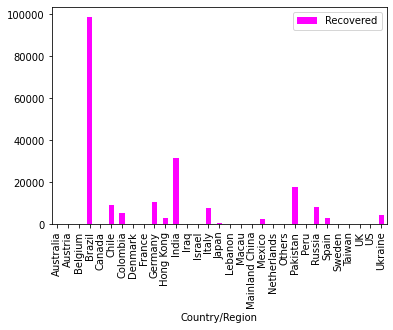

In [ ]:
#Measures of central tenancy of data set (mean etc)
x1=df.groupby(['Country/Region']).agg({'Confirmed':'mean'})
x1.plot(kind='bar',color=["blue"])
plt.legend(loc ="upper right")
plt.grid()

#Measures of central tenancy of data set (median etc)
x1=df.groupby(['Country/Region']).agg({'Recovered':'median'})
x1.plot(kind='bar',color=["magenta"])
plt.legend(loc ="upper right")

In [ ]:
Scatter plots for Deaths and Confirmed cases as well as Recovered and Confirmed Cases
#Correlation of attributes in your dataset

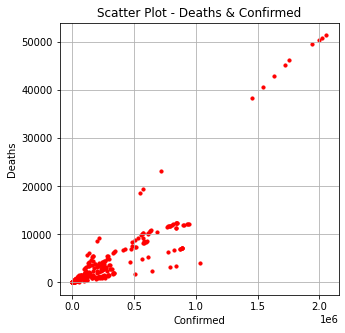

In [ ]:
data_india = sam[sam["Country/Region"]== "India"]
data_india.plot(kind = "scatter", x='Confirmed',y='Deaths',grid = True,color = "red", s = 10 ,figsize=(5,5))
plt.xlabel('Confirmed')             
plt.ylabel('Deaths')
plt.title('Scatter Plot - Deaths & Confirmed')  
plt.show()

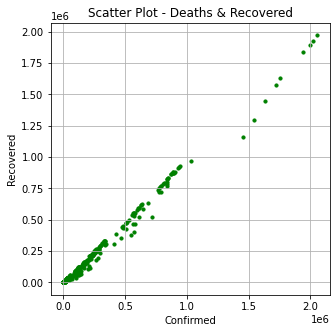

In [ ]:
data_india.plot(kind = "scatter", x='Confirmed',y='Recovered',grid = True,color = "green", s = 10 ,figsize=(5,5))
plt.xlabel('Confirmed')             
plt.ylabel('Recovered')
plt.title('Scatter Plot - Deaths & Recovered')  
plt.show()

{'boxes': [<matplotlib.patches.PathPatch at 0x7fab1f077310>],
 'caps': [<matplotlib.lines.Line2D at 0x7fab1f072790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab1f05a7d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fab1f05a250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fab1f3bbad0>,
  <matplotlib.lines.Line2D at 0x7fab1f072250>]}

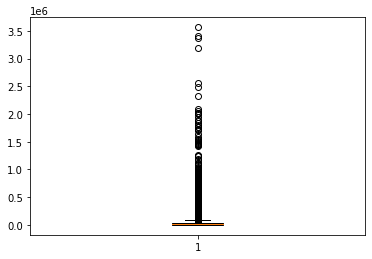

In [ ]:
#Determining presence of outliers in your dataset(boxplot)

plt.boxplot(sam['Confirmed'],patch_artist = True)

{'boxes': [<matplotlib.patches.PathPatch at 0x7fab1f23d410>],
 'caps': [<matplotlib.lines.Line2D at 0x7fab1f248e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab1f235ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fab1f235950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fab1f0fc450>,
  <matplotlib.lines.Line2D at 0x7fab1f248950>]}

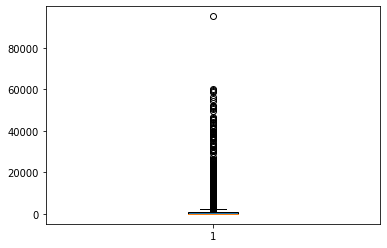

In [ ]:
# Determining presence of outliers in your dataset(boxplot)
plt.boxplot(sam['Deaths'],patch_artist = True)

In [ ]:
#Using Inter Quartile Range method to take care of outliers 

Q1 = sam.quantile(0.25)
Q3 = sam.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SNo          111078.75
Confirmed     32658.25
Deaths          979.00
Recovered     10429.75
Active         9686.50
dtype: float64


In [ ]:
#shape of the sample data before
sam.shape

(10000, 9)

In [ ]:
sam_out = sam[~((sam < (Q1 - 1.5 * IQR)) |(sam > (Q3 + 1.5 * IQR))).any(axis=1)]
sam_out.shape

(7175, 9)

Now, the outliers have been cleared

In [ ]:
# Group data by country
country_grouped=df.groupby(['Country/Region','ObservationDate']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

# get total sum of each country
total_sum_country = country_grouped.groupby(['Country/Region']).tail(1)
total_sum_country.tail(10)

,,Confirmed,Recovered,Deaths
Country/Region,ObservationDate,,,
Others,03/23/2020,712.0,567.0,8.0
Pakistan,12/31/2020,482178.0,437229.0,10176.0
Peru,12/31/2020,1015137.0,951318.0,37680.0
Russia,12/31/2020,3127347.0,2527722.0,56271.0
Spain,12/31/2020,1928265.0,150376.0,50837.0
Sweden,12/31/2020,437379.0,0.0,8727.0
Taiwan,03/10/2020,47.0,17.0,1.0
UK,12/31/2020,2496235.0,5482.0,73622.0
US,12/31/2020,20061903.0,0.0,352729.0


In [ ]:
total_sum_country = total_sum_country.reset_index()
top_10_confirmed_country = total_sum_country.sort_values(by=['Confirmed'],ascending=False).head(10)
top_10_confirmed_country

,index,Country/Region,ObservationDate,Confirmed,Recovered,Deaths
29,29,US,12/31/2020,20061903.0,0.0,352729.0
11,11,India,12/31/2020,10266674.0,9860280.0,148738.0
3,3,Brazil,12/31/2020,7675973.0,6848844.0,194949.0
24,24,Russia,12/31/2020,3127347.0,2527722.0,56271.0
28,28,UK,12/31/2020,2496235.0,5482.0,73622.0
14,14,Italy,12/31/2020,2107166.0,1463111.0,74159.0
25,25,Spain,12/31/2020,1928265.0,150376.0,50837.0
9,9,Germany,12/31/2020,1760520.0,1350708.0,33791.0
6,6,Colombia,12/31/2020,1642775.0,1508419.0,43213.0
19,19,Mexico,12/31/2020,1426094.0,1074795.0,125807.0


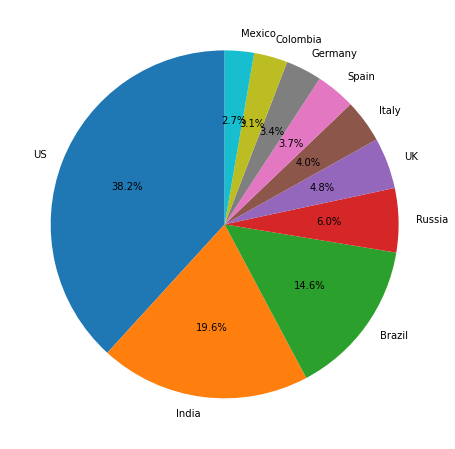

In [ ]:
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(top_10_confirmed_country['Confirmed'], labels=top_10_confirmed_country['Country/Region'], autopct='%1.1f%%', startangle=90)
plt.show()

In [ ]:
bar_grouped=sam.groupby(['Country/Region']).agg({"Active":'sum',"Recovered":'sum',"Deaths":'sum'})
bar_grouped.head()

,Active,Recovered,Deaths
Country/Region,,,
Australia,112944.0,387628.0,14662.0
Belgium,3856018.0,0.0,77073.0
Brazil,8337608.0,65788707.0,2145309.0
Canada,683782.0,4511679.0,194165.0
Chile,596995.0,6625776.0,193396.0


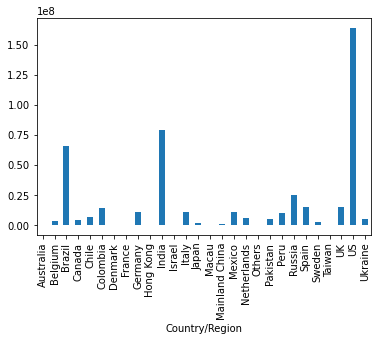

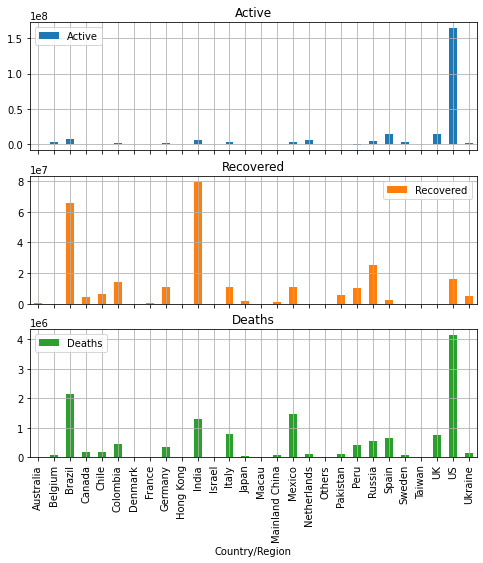

In [ ]:
bar_grouped.loc[:,'Active'].plot(kind='bar')
bar_grouped.loc[:,'Recovered'].plot(kind='bar')
bar_grouped.loc[:,'Deaths'].plot(kind='bar')
bar_grouped.plot(kind='bar',grid=True,subplots=True,sharex=True, figsize = (8,8)); 